In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
df= pd.read_csv ('bengaluru_house_prices.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df2=df.drop(['area_type','availability','society'], axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [10]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
def Roomsize(x):
    return float(x.split(' ')[0])

In [13]:
Roomsize('27 BHK')

27.0

In [14]:
df3=df2.dropna()

In [15]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [16]:
df3['BHK']=df3['size'].apply(Roomsize)

C:\Users\Aaqib Sayyed\AppData\Local\Temp\ipykernel_1212\272977725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(Roomsize)


In [17]:
df3

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3.0
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4.0


In [18]:
df4=df3.drop(['size'], axis='columns')

In [19]:
df4.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Kothanur,1200,2.0,1.0,51.00,2.0


In [20]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def total_sqft_room(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return float(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    else:
        return True 

In [23]:
df4[~df4['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4.0
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2.0
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2.0
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2.0
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2.0
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3.0
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2.0
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2.0


In [24]:
df5=df4.copy()

In [25]:
df5['total_sqft']=df5['total_sqft'].apply(total_sqft_room)

In [26]:
df5

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [27]:
df5.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
BHK                 4.0
Name: 30, dtype: object

In [28]:
(2100+2850)/2

2475.0

In [29]:
df4.iloc[30]

location      Raja Rajeshwari Nagar
total_sqft                     1693
bath                            3.0
balcony                         3.0
price                         57.39
BHK                             3.0
Name: 33, dtype: object

In [30]:
df5

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [31]:
df5

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [32]:
df5.head(3)

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0


In [33]:
Location_Stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [34]:
Location_Stats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          261
Thanisandra             231
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1265, dtype: int64

In [35]:
Location_Stats_under_10=Location_Stats[Location_Stats<=10]
len(Location_Stats_under_10)

1028

In [36]:
df5.location=df5.location.apply(lambda x: 'others' if x in Location_Stats_under_10 else x)

In [37]:
df5.head(3)

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0


In [38]:
df5.rename(columns={'BHK':'bhk'}, inplace=True)

In [39]:
df5

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [40]:
len(df5.location.unique())

238

In [41]:
(39.07*100000)/1056.0

3699.810606060606

In [42]:
df5['price_per_sqft']=(df5.price*100000)/df5.total_sqft

In [43]:
df5

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [44]:
df5

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [45]:
df5[df5.total_sqft/df5.bhk<300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6.0,10660.980810
68,others,1350.0,7.0,0.0,85.0,8.0,6296.296296
70,others,500.0,3.0,2.0,100.0,3.0,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2.0,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6.0,22535.211268
...,...,...,...,...,...,...,...
13219,Laggere,1590.0,9.0,3.0,132.0,7.0,8301.886792
13221,others,1178.0,9.0,1.0,75.0,9.0,6366.723260
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5.0,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5.0,9043.927649


In [46]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [47]:
df6

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [48]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for location, location_df in df.groupby('location'):
        mean=np.mean(location_df.price_per_sqft)
        std=np.std(location_df.price_per_sqft)
        reduced_df=location_df[(location_df.price_per_sqft>(mean-std)) & (location_df.price_per_sqft<(mean+std))]
        df_out=pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [50]:
df7=remove_pps_outliers(df6)

In [51]:
df7

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3.0,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2.0,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2.0,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2.0,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3.0,4561.403509
...,...,...,...,...,...,...,...
9844,others,1256.0,2.0,1.0,65.00,2.0,5175.159236
9845,others,1353.0,2.0,2.0,110.00,2.0,8130.081301
9846,others,812.0,1.0,0.0,26.00,1.0,3201.970443
9847,others,1440.0,2.0,2.0,63.93,3.0,4439.583333


In [52]:
def scatter_bhk_same(df,location):
    plt.rcParams['figure.figsize'] = (15,10)
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price, marker='*', color='red',label='2 bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price, color='blue', label='3 bhk')
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.legend()
    

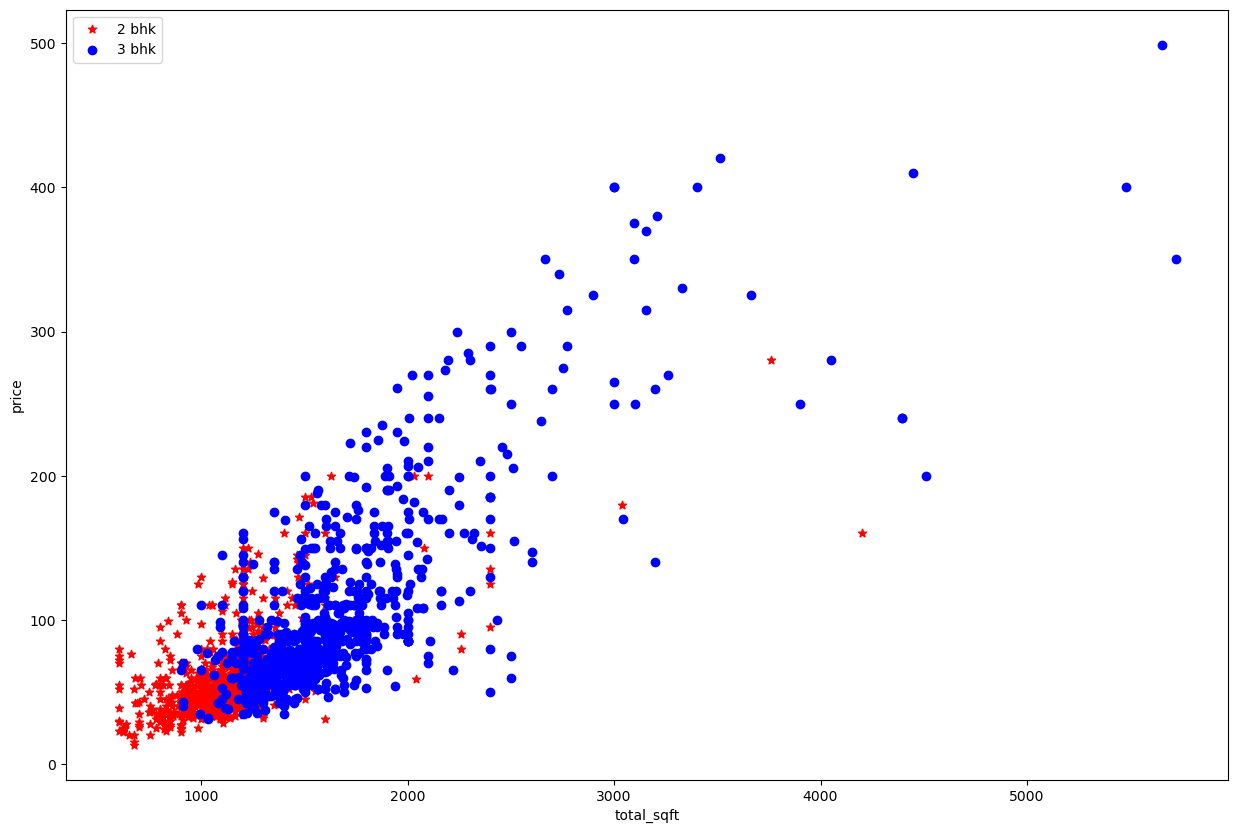

In [53]:
scatter_bhk_same(df7,"others")

Text(0, 0.5, 'counts')

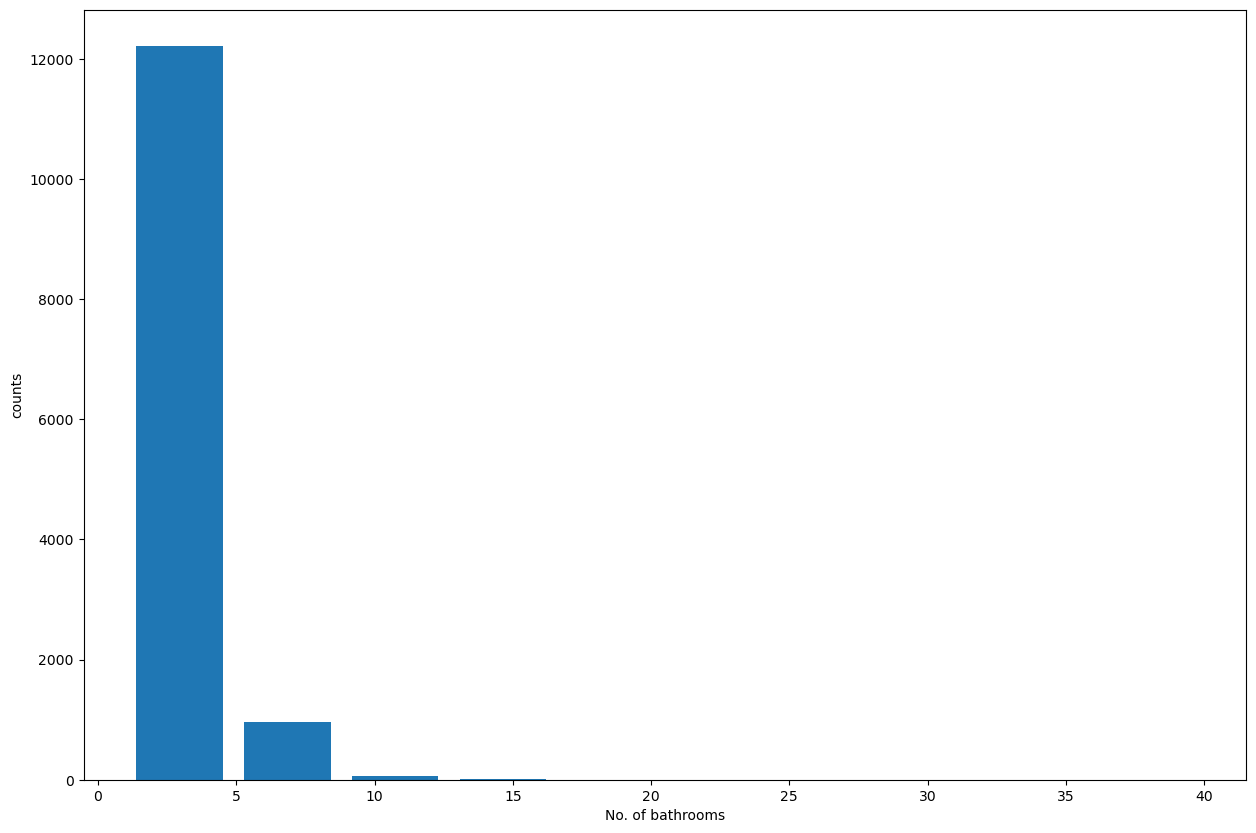

In [54]:
plt.hist(df.bath, rwidth=0.8)
plt.xlabel('No. of bathrooms')
plt.ylabel('counts')

In [55]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
            'mean':np.mean(bhk_df.price_per_sqft), 
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
            
        }
            for bhk, bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

In [56]:
df8

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2.0,4540.654699
...,...,...,...,...,...,...,...
9839,others,1155.0,2.0,1.0,64.0,2.0,5541.125541
9841,others,1200.0,2.0,3.0,70.0,2.0,5833.333333
9842,others,1800.0,1.0,1.0,200.0,1.0,11111.111111
9845,others,1353.0,2.0,2.0,110.0,2.0,8130.081301


In [57]:
df9=df8[df8.bath <= df8.bhk+2]

In [58]:
df9

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2.0,4540.654699
...,...,...,...,...,...,...,...
9839,others,1155.0,2.0,1.0,64.0,2.0,5541.125541
9841,others,1200.0,2.0,3.0,70.0,2.0,5833.333333
9842,others,1800.0,1.0,1.0,200.0,1.0,11111.111111
9845,others,1353.0,2.0,2.0,110.0,2.0,8130.081301


In [59]:
dummies=pd.get_dummies(df9.location)

In [60]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df10=pd.concat([df9.drop(['location'], axis='columns'),dummies.drop(['others'], axis='columns')], axis='columns')

In [62]:
df10

,total_sqft,bath,balcony,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2.0,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2.0,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2.0,3418.803419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3.0,4561.403509,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2.0,4540.654699,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,1155.0,2.0,1.0,64.0,2.0,5541.125541,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9841,1200.0,2.0,3.0,70.0,2.0,5833.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842,1800.0,1.0,1.0,200.0,1.0,11111.111111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,1353.0,2.0,2.0,110.0,2.0,8130.081301,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X=df10.drop(['price'], axis='columns')
y=df10.price

In [64]:
X

,total_sqft,bath,balcony,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2.0,3200.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2.0,6916.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2.0,3418.803419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3.0,4561.403509,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2.0,4540.654699,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,1155.0,2.0,1.0,2.0,5541.125541,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9841,1200.0,2.0,3.0,2.0,5833.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842,1800.0,1.0,1.0,1.0,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,1353.0,2.0,2.0,2.0,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y

1        40.0
2        83.0
3        40.0
4        65.0
5        43.0
        ...  
9839     64.0
9841     70.0
9842    200.0
9845    110.0
9846     26.0
Name: price, Length: 7035, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [67]:
 X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)

In [68]:
X_train.shape

(5628, 242)

In [69]:
Linear_model=LinearRegression()

In [70]:
Linear_model.fit(X_train,y_train)

LinearRegression()

In [71]:
Linear_model.score(X_test,y_test)

0.8649857670160774

In [72]:
cv=ShuffleSplit(n_splits=5, test_size=0.2)

In [73]:
cross_val_score(Linear_model, X, y, cv=cv)

array([0.91391377, 0.92061276, 0.91646059, 0.86186594, 0.86297485])

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [75]:
def get_best_model(X,y):
    
    algo={
        'LinearRegression':{
            'model': LinearRegression(),
            'Params':{ 'normalize': [True, False] }
                            },
        
        'Lasso' : {        
            'model':Lasso(),
            'Params' : { 'alpha':[1,2],
                         'selection': ['random', 'cyclic'] }
            
                  },
        
        
        'DecisionTree':{
            
            'model':DecisionTreeRegressor(),
             'Params' : { 'criterion' : ['mse','friedman_mse'],
                          'splitter': ['best','random'] }
                        },
         }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, algo_para in algo.items():
        gs=GridSearchCV(algo_para['model'],algo_para['Params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,  
            'best_scores' : gs.best_score_,
            'best_para' : gs.best_params_
                        })
        
    return pd.DataFrame(scores, columns=['model','best_scores','best_para'])
        
        
        
    

In [76]:
get_best_model(X,y)

C:\Users\Aaqib Sayyed\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Aaqib Sayyed\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

,model,best_scores,best_para
0,LinearRegression,0.922224,{'normalize': False}
1,Lasso,0.906807,"{'alpha': 2, 'selection': 'cyclic'}"
2,DecisionTree,0.949232,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [77]:
def price_pred(location,total_sqft,bath,balcony,bhk,price_per_sqft):
    index_loc=np.where (X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=total_sqft
    x[1]=bath
    x[2]=balcony
    x[3]=bhk
    x[4]=price_per_sqft
    
    if index_loc>=0:
        x[index_loc]=1
    return Linear_model.predict([x])[0]

In [97]:
price_pred('1st phase jp nagar', 2000, 5, 5, 5, 8000.666667)

C:\Users\Aaqib Sayyed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


147.03821022551585

In [94]:
index_loc=np.where (X.columns=='1st block jayanagar')[0][0]
index_loc

6

In [ ]:
X

In [ ]:
y

In [ ]:
import pickle 
with open('Bangalore Home Price Model.pickle', 'wb') as f:
    pickle.dump(Linear_model,f)

In [ ]:
X.loc[1]

In [ ]:
import json

In [ ]:
columns= {
    
    'data_columns': [columns.lower() for columns in X.columns]
}


In [ ]:
with open ('coulmns.json','w') as f:
    f.write(json.dumps(columns))

In [81]:
X.rename(columns=str.lower, inplace=True)

In [82]:
X

,total_sqft,bath,balcony,bhk,price_per_sqft,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1250.0,2.0,2.0,2.0,3200.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2.0,6916.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2.0,3418.803419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3.0,4561.403509,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2.0,4540.654699,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,1155.0,2.0,1.0,2.0,5541.125541,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9841,1200.0,2.0,3.0,2.0,5833.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842,1800.0,1.0,1.0,1.0,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,1353.0,2.0,2.0,2.0,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
import pickle 
with open('Bangalore Home Price Model.pickle', 'wb') as f:
    pickle.dump(Linear_model,f)